In [270]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

# データの読み込み
train = pd.read_csv('/content/drive/MyDrive/signate/練習 お弁当の需要予測/train.csv')
test = pd.read_csv('/content/drive/MyDrive/signate/練習 お弁当の需要予測/test.csv')
samplesubmission = pd.read_csv('/content/drive/MyDrive/signate/練習 お弁当の需要予測/sample.csv',header=None)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24555 (\N{CJK UNIFIED IDEOGRAPH-5FEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26228 (\N{CJK UNIFIED IDEOGRAPH-6674}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26311 (\N{CJK UNIFIED IDEOGRAPH-66C7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34180 (\N{CJK UNIFIED IDEOGRAPH-8584}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

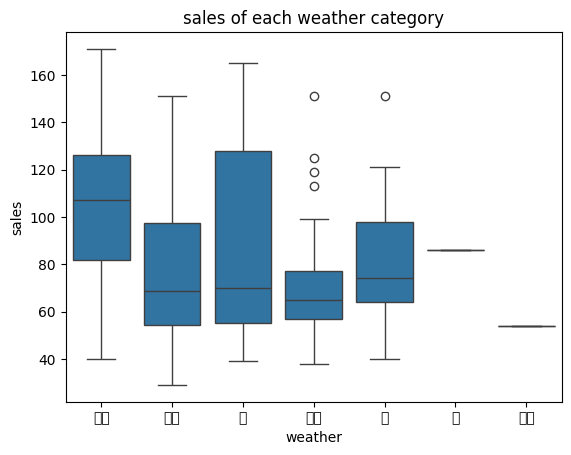

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='weather', y='y', data=train, order=["快晴","晴れ","曇","薄曇","雨","雪","雷電"])
# y軸にラベルを付けて表示
plt.title("sales of each weather category")
plt.ylabel("sales")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

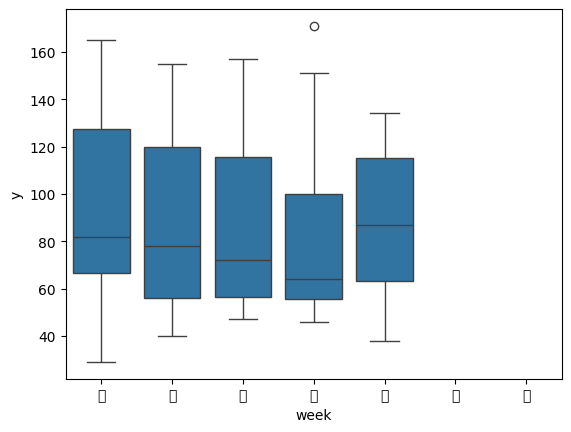

In [272]:
sns.boxplot(x='week', y='y', data=train, order=["月","火","水","木","金","土","日"])
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12515 (\N{KATAKANA LETTER SMALL YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-

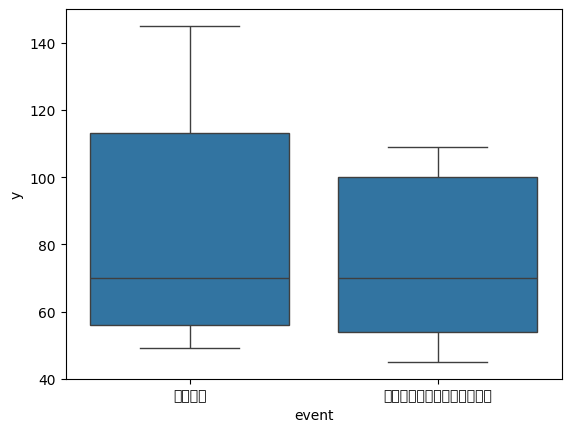

In [273]:
sns.boxplot(x='event', y='y', data=train)
plt.show()

In [274]:
y=train['y']
train.drop(['y'], axis=1, inplace=True)
all_data = pd.concat((train, test)).reset_index(drop=True)

In [275]:
all_data["year"]=all_data["datetime"].apply(lambda x:x.split("-")[0]).astype(int)
all_data["month"]=all_data["datetime"].apply(lambda x:x.split("-")[1]).astype(int)
month_dict = {
    '月': 1, '火': 2, '水': 3, '木': 4,
    '金': 5, '土': 6, '日': 7
}
all_data['week'] = all_data['week'].map(lambda x: month_dict.get(str(x).lower())).astype(int)
all_data['precipitation']=all_data['precipitation'].apply(lambda x:0 if x=='--' else float(x))
all_data["remarks"] = all_data.apply(lambda x: 1 if x['remarks'] == 'お楽しみメニュー' and 'カレー' in x['name'] else 0, axis=1)
all_data["weather"] = all_data["weather"].apply(lambda x: "雪" if x == '雷電' else x)
from sklearn.preprocessing import LabelEncoder
for c in ("event","weather"):
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
all_data.drop(["datetime","name"],axis=1,inplace=True)
all_data['temperature'] = all_data['temperature'].apply(lambda x: round(x, 0))

In [276]:
all_data["payday"].fillna(0.5,inplace=True)
all_data["kcal"].fillna(all_data["kcal"].median(),inplace=True)

In [277]:
train =  all_data.iloc[100:207]
test = all_data.iloc[207:, :]

In [278]:
#目的変数及び説明変数を表す変数の準備
y_train = y.iloc[100:207] # 目的変数
X_train = train
X_test =test

model=LR()
model.fit(X_train,y_train)
y_test=model.predict(X_test)
y_test=np.round(y_test).astype(int)

In [279]:
y_test_series = pd.Series(y_test)
result_df = pd.concat([samplesubmission.iloc[:, 0],y_test_series], axis=1)
result_df.to_csv('/content/drive/MyDrive/signate/練習 お弁当の需要予測/submit.csv', header=False, index=False)

In [280]:
train_sub1=train.head(100)
train_sub2=train.iloc[100:, :]
sub_y1=y.head(100)
sub_y2=y.iloc[100:]

train_sub1.drop(["event"],axis=1,inplace=True)
train_sub2.drop(["event"],axis=1,inplace=True)

model=LR()
model.fit(train_sub1,sub_y1)
predict1=model.predict(train_sub2)
RMSE=np.sqrt(MSE(sub_y2,predict1))
print(RMSE)

<ipython-input-280-cabc4247e43e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sub1.drop(["event"],axis=1,inplace=True)
<ipython-input-280-cabc4247e43e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sub2.drop(["event"],axis=1,inplace=True)


ValueError: Found input variables with inconsistent numbers of samples: [107, 7]